In [1]:
import pandas as pd
import re
from random import random
import emoji
from tqdm import notebook
def tqdm(x, **kargs):
    return notebook.tqdm(x, leave=False, **kargs)
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from collections import Counter, defaultdict
import torch
from torch.nn import BCEWithLogitsLoss, MultiLabelMarginLoss
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
from transformers import BertModel, BertTokenizer, BertForSequenceClassification
from transformers.modeling_bert import BertPreTrainedModel

I0528 05:51:09.214484 139967809861440 file_utils.py:39] PyTorch version 1.5.0 available.


In [120]:
from transformers import RobertaModel, RobertaTokenizer, RobertaForSequenceClassification
from transformers.modeling_roberta import ROBERTA_PRETRAINED_MODEL_ARCHIVE_MAP, RobertaClassificationHead
from transformers.configuration_roberta import RobertaConfig

In [5]:
from simpletransformers.classification import MultiLabelClassificationModel
from sklearn.preprocessing import MultiLabelBinarizer

In [58]:
df = pd.read_json('./source/train_gold.json', lines=True)
df_new = df.copy()

In [59]:
mlb = MultiLabelBinarizer()
multi_hot = mlb.fit_transform(df_new['categories'].values)
multi_hot_list = [list(_) for _ in multi_hot]

In [61]:
df_new['labels'] = multi_hot_list
df_new = df_new[['text', 'reply', 'labels']]
df_new.columns = ['text_a', 'text_b', 'labels']

In [62]:
df_new.head()

,text_a,text_b,labels
0,we can all agree that any song by Niall Horan.,oui oui,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Will you be installing #ScottyFromMarketing's ...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Growing up my mum would call me a Nigga despit...,And he joins in??? Pour some hot grits on em,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Rest your head on my chest when the world feel...,😂😂😂😂😂,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Imagine Will Hernandez and Wills both doing a ...,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [63]:
train_args = {
    "output_dir": "outputs/",
    "cache_dir": "cache/",
    "best_model_dir": "outputs/best_model/",

    "fp16": False,
    "fp16_opt_level": "O1",
    "max_seq_length": 128,
    "train_batch_size": 32,
    "eval_batch_size": 32,
    "gradient_accumulation_steps": 1,
    "num_train_epochs": 1,
    "weight_decay": 0,
    "learning_rate": 4e-5,
    "adam_epsilon": 1e-8,
    "warmup_ratio": 0.06,
    "warmup_steps": 0,
    "max_grad_norm": 1.0,
    "do_lower_case": False,

    "logging_steps": 50,
    "evaluate_during_training": False,
    "evaluate_during_training_steps": 2000,
    "evaluate_during_training_verbose": False,
    "use_cached_eval_features": False,
    "save_eval_checkpoints": True,
    "save_steps": 2000,
    "no_cache": False,
    "save_model_every_epoch": True,
    "tensorboard_dir": None,

    "overwrite_output_dir": False,
    "reprocess_input_data": True,

    "n_gpu": 1,
    "silent": False,
    "use_multiprocessing": False,

    "wandb_project": None,
    "wandb_kwargs": {},

    "use_early_stopping": True,
    "early_stopping_patience": 3,
    "early_stopping_delta": 0,
    "early_stopping_metric": "eval_loss",
    "early_stopping_metric_minimize": True,

    "manual_seed": None,
    "encoding": None,
    "config": {}
}

In [64]:
model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=43, args=train_args)

I0528 08:05:44.215915 140570683492160 configuration_utils.py:285] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-config.json from cache at /home/ino/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.117c81977c5979de8c088352e74ec6e70f5c66096c28b61d3c50101609b39690
I0528 08:05:44.216937 140570683492160 configuration_utils.py:321] Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",

In [66]:
model.train_model(df_new)

I0528 08:06:00.336354 140570683492160 classification_model.py:801]  Converting to features started. Cache is not used.


Running loss: 0.134398

I0528 08:11:50.538516 140570683492160 configuration_utils.py:144] Configuration saved in outputs/checkpoint-1000-epoch-1/config.json


I0528 08:11:51.021540 140570683492160 modeling_utils.py:483] Model weights saved in outputs/checkpoint-1000-epoch-1/pytorch_model.bin
I0528 08:11:51.777126 140570683492160 configuration_utils.py:144] Configuration saved in outputs/config.json


I0528 08:11:52.144607 140570683492160 modeling_utils.py:483] Model weights saved in outputs/pytorch_model.bin
I0528 08:11:52.224653 140570683492160 classification_model.py:279]  Training of roberta model complete. Saved to outputs/.


In [68]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(df_new)
print(result)
print(model_outputs)


{'LRAP': 0.33911590707358946, 'eval_loss': 0.12927393313497304}
[[0.106563   0.09228969 0.02660343 ... 0.09141588 0.00963511 0.01519078]
 [0.10476324 0.08627755 0.02636511 ... 0.10016949 0.00949513 0.0167002 ]
 [0.10462174 0.10616038 0.02834731 ... 0.07819244 0.01117014 0.01637008]
 ...
 [0.05707459 0.0700381  0.03948026 ... 0.05524815 0.01141504 0.0683881 ]
 [0.07803417 0.12146964 0.04013249 ... 0.08036377 0.00937227 0.03468832]
 [0.1031523  0.10981105 0.02947175 ... 0.07654577 0.01117176 0.01665912]]


In [96]:
avg_map = 0
total_predict = []

for eid, each_outputs in enumerate(model_outputs):
    predict_class = []
    correct = 0
    sort_index = sorted(range(len(model_outputs[eid])), key=lambda k: model_outputs[eid][k], reverse=True)
    for key, value in categories_mapping.items():
        if value in sort_index[0:6]:
            if key in df['categories'][eid]:
                correct += 1
            predict_class.append(key)
    avg_map += (correct / len(df['categories'][eid]))
    total_predict.append(predict_class)

avg_map /= len(df['categories'])
print("avg map = {}".format(avg_map))

avg map = 0.45852552083333087


In [99]:
df_dev = pd.read_json('./source/dev_unlabeled.json', lines=True)
df_dev_result = df_dev.copy()[['text', 'reply']]
df_dev_result.columns = ['text_a', 'text_b']
df_dev_result.head()

,text_a,text_b
0,"Drop your cash app, use hashtag #BailoutHumansNow",$tyratomaro #BailoutHumans
1,After interviewing with a few incredible peopl...,CONGRATS!!!!!
2,I know GTC festival not happening next month b...,
3,"Lordy, my daughter just said, “I wonder how th...",
4,THE UNEMPLOYMENT CLAIM SYSTEM SUCKS SO MUCH DICK,Watching everyone else get their weekly unempl...


In [135]:
predictions, raw_outputs = model.predict(df_dev_result['text_a'].values.tolist())

I0528 09:11:03.788838 140570683492160 classification_model.py:801]  Converting to features started. Cache is not used.


In [136]:
raw_outputs.shape

(4000, 43)

In [137]:
total_predict = []
for eid, row in enumerate(raw_outputs):
    predict_class = []
    correct = 0
    sort_index = sorted(range(len(row)), key=lambda k: row[k], reverse=True)
    for key, value in categories_mapping.items():
        if value in sort_index[0:6]:
            predict_class.append(key)
    total_predict.append(predict_class)

In [141]:
df_dev['categories'] = total_predict

In [142]:
df_dev.head()

,idx,text,reply,categories
0,32000,"Drop your cash app, use hashtag #BailoutHumansNow",$tyratomaro #BailoutHumans,"[agree, applause, awww, hug, thank_you, yes]"
1,32001,After interviewing with a few incredible peopl...,CONGRATS!!!!!,"[agree, applause, hug, no, slow_clap, yes]"
2,32002,I know GTC festival not happening next month b...,,"[agree, applause, no, seriously, shocked, yes]"
3,32003,"Lordy, my daughter just said, “I wonder how th...",,"[agree, applause, facepalm, seriously, sigh, smh]"
4,32004,THE UNEMPLOYMENT CLAIM SYSTEM SUCKS SO MUCH DICK,Watching everyone else get their weekly unempl...,"[agree, applause, facepalm, no, seriously, smh]"


In [144]:
df_dev.to_json('./results/dev.json', orient='records', lines=True)

## Data cleaning

In [83]:
# https://github.com/minerva-ml/open-solution-toxic-comments/blob/master/external_data/apostrophes.json
apostrophes = {
  "arent": "are not",
  "cant": "cannot",
  "couldnt": "could not",
  "didnt": "did not",
  "doesnt": "does not",
  "dont": "do not",
  "hadnt": "had not",
  "hasnt": "has not",
  "havent": "have not",
  "hed": "he would",
  "hell": "he will",
  "hes": "he is",
  "id": "I had",
  "ill": "I will",
  "im": "I am",
  "isnt": "is not",
  "its": "it is",
  "itll": "it will",
  "ive": "I have",
  "lets": "let us",
  "mightnt": "might not",
  "mustnt": "must not",
  "shant": "shall not",
  "shed" : "she would",
  "shell": "she will",
  "shes": "she is",
  "shouldnt": "should not",
  "thats": "that is",
  "theres": "there is",
  "theyd": "they would",
  "theyll": "they will",
  "theyre": "they are",
  "theyve": "they have",
  "wed": "we would",
  "were": "we are",
  "werent": "were not",
  "weve": "we have",
  "whatll": "what will",
  "whatre": "what are",
  "whats": "what is",
  "whatve": "what have",
  "wheres": "where is",
  "whod": "who would",
  "wholl": "who will",
  "whore": "who are",
  "whos": "who is",
  "whove": "who have",
  "wont": "will not",
  "wouldnt": "would not",
  "youd": "you would",
  "youll": "you will",
  "youre": "you are",
  "youve": "you have",
  "re":  "are",
  "wasnt": "was not",
  "well":  "will"
}

In [84]:
# https://github.com/minerva-ml/open-solution-toxic-comments/blob/master/external_data/compiled_bad_words.txt
compiled_bad_list = pd.read_csv('https://raw.githubusercontent.com/minerva-ml/open-solution-toxic-comments/master/external_data/compiled_bad_words.txt', header=None)
compiled_bad_list = list(compiled_bad_list[0].values)

In [85]:
# From https://github.com/kaymal/twitter-emotions/blob/master/data-preprocessing.ipynb
def preprocess_tweet(tweet):
    # To lowercase (not good for VADER)
    tweet = tweet.lower()
    
    # Remove fucking words
    for bad_word in compiled_bad_list:
        bad_candidate = ' ' + bad_word + ' '
        tweet = tweet.replace(bad_candidate, ' ')
        
    # Replace emoji unicode to text
#     tweet = emoji.demojize(tweet)
#     tweet = tweet.replace('_', ' ')
#     tweet = tweet.replace(':', ' ')
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')    
    
    # Replace apostrophes to original term
    for key in apostrophes.keys():
        tweet = tweet.replace(' ' + key + ' ', ' ' + apostrophes[key])
    
    # Remove punctuation
    tweet = tweet.replace('.', ' ')
    tweet = tweet.replace(',', ' ')
    
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    
    #Convert @username to "user"
    tweet = re.sub('@[^\s]+', 'user', tweet)
    
    # Remove whitespace (including new line characters)
#     tweet = re.sub(r'\s\s+', ' ', tweet)
    tweet = tweet.replace('\t', '')
    tweet = tweet.replace('\n', '')
    
#     # Remove single space remaining at the front of the tweet.
#     tweet = tweet.lstrip(' ')
    
#     # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
#     tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    
#     # Convert hyperlinks ->>>> For now just replace with http
#     tweet = re.sub(r'https?:\/\/.*\/\w*', 'http', tweet)

#     #Remove @user
#     tweet = re.sub('@[^\s]+','',tweet)
    
#     # Remove tickers such as USD ($)
#     tweet = re.sub(r'\$\w*', '', tweet)
    
#     # Remove hashtags (not good for VADER)
#     tweet = re.sub(r'#\w*', '', tweet)
    
#     # Remove Punctuation and split 's, 't, 've with a space for filter
#     tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    
#     # Remove words with 2 or fewer letters
#     tweet = re.sub(r'\b\w{1,2}\b', '', tweet)

    return tweet

In [86]:
df['text'] = df.text.apply(preprocess_tweet)
df['reply'] = df.reply.apply(preprocess_tweet)
print(df['text'][173])
print(df['reply'][3])

a toxic fav line is i just be chilling like no tf you do not



In [82]:
categories_type = pd.read_json('./source/categories.json', lines=True)
categories_mapping = {v[0]: k for k, v in categories_type.to_dict('list').items()}

## Multilabel classification of BERT

In [101]:
class BertForMultiLabelSequenceClassification(BertPreTrainedModel):
    """BERT model for classification. This module is composed of the BERT model with a linear layer on top of the pooled output. """ 
    def __init__(self, config, num_labels=43):
        super(BertForMultiLabelSequenceClassification, self).__init__(config)
        self.num_labels = num_labels
        self.bert = BertModel(config)
        self.dropout = torch.nn.Dropout(config.hidden_dropout_prob)
        self.classifier = torch.nn.Linear(config.hidden_size, num_labels)
        self.apply(self._init_weights)

    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        print(input_ids)
        print(input_ids.shape)
        print(token_type_ids)
        print(token_type_ids.shape)
        _, pooled_output = self.bert(input_ids, token_type_ids, attention_mask)
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        if labels is not None:
            loss_fct = BCEWithLogitsLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1, self.num_labels))
            return loss
        else:
            return logits
        
    def freeze_bert_encoder(self):
        for param in self.bert.parameters():
            param.requires_grad = False

    def unfreeze_bert_encoder(self):
        for param in self.bert.parameters():
            param.requires_grad = True

## Multilabel classification of RoBERTa

In [121]:
class RobertaForMultiLabelSequenceClassification(BertPreTrainedModel):
    """
    Roberta model adapted for multi-label sequence classification
    """

    config_class = RobertaConfig
    pretrained_model_archive_map = ROBERTA_PRETRAINED_MODEL_ARCHIVE_MAP
    base_model_prefix = "roberta"

    def __init__(self, config, pos_weight=None):
        super(RobertaForMultiLabelSequenceClassification, self).__init__(config)
        self.num_labels = config.num_labels
        self.pos_weight = pos_weight

        self.roberta = RobertaModel(config)
        self.classifier = RobertaClassificationHead(config)

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
    ):
        outputs = self.roberta(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
        )
        sequence_output = outputs[0]
        logits = self.classifier(sequence_output)

        outputs = (logits,) + outputs[2:]
        if labels is not None:
            loss_fct = BCEWithLogitsLoss(pos_weight=self.pos_weight)
            labels = labels.float()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1, self.num_labels))
            outputs = (loss,) + outputs

        return outputs

## Preprocessing json

In [122]:
# https://github.com/jiesutd/pytorch-pretrained-BERT/blob/master/examples/lm_finetuning/pregenerate_training_data.py
def truncate_seq_pair(tokens_a, tokens_b, max_num_tokens):
    """Truncates a pair of sequences to a maximum sequence length. Lifted from Google's BERT repo."""
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_num_tokens:
            break

        trunc_tokens = tokens_a if len(tokens_a) > len(tokens_b) else tokens_b
        assert len(trunc_tokens) >= 1

        # We want to sometimes truncate from the front and sometimes from the
        # back to add more randomness and avoid biases.
        if random() < 0.5:
            del trunc_tokens[0]
        else:
            trunc_tokens.pop()

In [123]:
class Preprocess():
    def __init__(self, epochs=6, batch_size=64, max_seq_length=128, categories=None):
        self.label = categories
        self.epochs = epochs
        self.batch_size = batch_size
        self.max_seq_length = max_seq_length
#         self.model = BertForMultiLabelSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(categories), output_hidden_states=False)
#         self.tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
        self.model = RobertaForMultiLabelSequenceClassification.from_pretrained("roberta-base", num_labels=len(categories), output_hidden_states=False)
        self.tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

    
    def tokenize(self, sentance):
        return self.tokenizer.tokenize(sentance)
    
    def convert_features_to_tensors(self, corpus_text, corpus_reply, corpus_class):
        df_tokenize = []
        for sid, sentance in enumerate(corpus_text):
            sentance_reply = corpus_reply[sid]
            token_sentance = self.tokenize(sentance)
            token_reply = self.tokenize(sentance_reply)
            
            # Since max length will > max_seq_length, need to truncate pairs
            truncate_seq_pair(token_sentance, token_reply, self.max_seq_length - 3)
            
            first_sentance = ['[CLS]'] + token_sentance + ['[SEP]']
            second_sentance = token_reply + ['[SEP]']
            tokens = self.tokenizer.convert_tokens_to_ids(first_sentance + second_sentance)
            len_first = len(first_sentance)
            len_second = len(second_sentance)
            tokens_tensor = torch.tensor(tokens)
            segments_tensor = torch.tensor([0] * len_first + [1] * len_second, dtype=torch.long)
            # Convert label to one hot encoding
            label_onehot_tensor = torch.zeros([len(self.label)])
            for each_class in corpus_class[sid]:
                label_onehot_tensor[self.label[each_class]] = 1
            df_tokenize.append([tokens_tensor, segments_tensor, label_onehot_tensor])
        return df_tokenize
    
    def create_mini_batch(self, corpus):
        tokens_tensors = [sentance[0] for sentance in corpus]
        segments_tensors = [sentance[1] for sentance in corpus]
        labels_tensors = torch.stack([sentance[2] for sentance in corpus])
#         labels_tensors = labels_tensors.type(torch.LongTensor)
        # zero padding
        tokens_tensors = torch.nn.utils.rnn.pad_sequence(tokens_tensors, batch_first=True)
        segments_tensors = torch.nn.utils.rnn.pad_sequence(segments_tensors, batch_first=True)
        # attention masks to set non-zero padding position to one to let BERT focus on these tokens
        masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
        masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
        return tokens_tensors, segments_tensors, masks_tensors, labels_tensors
    
    def train(self, training_data):
        # let model training on GPU
#         device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        device = torch.device("cpu")
        print("device:", device)
    
        # Load pretrained model
#         model_state_dict = torch.load('./models/bert_adam_3_256')
#         self.model = BertForMultiLabelSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(self.label), state_dict=model_state_dict)
        self.model = self.model.to(device)
        
        # training mode
        self.model.train()
        # select adam as optimizer to update weights
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=3e-5)
        
        for epoch in tqdm(range(self.epochs), desc='Training epochs: '):
            running_loss = 0
            for data in tqdm(training_data, desc='Training progress: '):
                tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]
                # Initial gradients
                optimizer.zero_grad()
                # forward pass
                loss = self.model(input_ids=tokens_tensors, 
                                token_type_ids=segments_tensors, 
                                attention_mask=masks_tensors, 
                                labels=labels)
                # backward
                loss.backward()
                optimizer.step()
                # Record current batch loss
                running_loss += loss.item()
            print("Epoch: {}, loss: {}".format(epoch + 1, running_loss))
        torch.save(self.model.state_dict(), './models/roberta_adam_{}_{}_{}'.format(self.epochs, self.batch_size, self.max_seq_length))
        # Calculate classification accuracy
#         _, acc = self.get_predictions(model, training_data, True)
        return self.model
    
    def baseline(self, corpus_text, corpus_reply, corpus_class):
        df_tokenize = self.convert_features_to_tensors(corpus_text, corpus_reply, corpus_class)
        train_loader = torch.utils.data.DataLoader(df_tokenize, batch_size=self.batch_size, collate_fn=self.create_mini_batch)
        tuned_model = self.train(train_loader)
        return tuned_model

In [124]:
max_seq_length = 128

In [125]:
preprocess_module = Preprocess(epochs=1, batch_size=32, max_seq_length=max_seq_length, categories=categories_mapping)

I0528 07:22:24.394951 139967809861440 configuration_utils.py:285] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-config.json from cache at /home/ino/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.117c81977c5979de8c088352e74ec6e70f5c66096c28b61d3c50101609b39690
I0528 07:22:24.396391 139967809861440 configuration_utils.py:321] Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",

In [126]:
tuned_model = preprocess_module.baseline(df['text'], df['reply'], df['categories'])

device: cpu


IndexError: index out of range in self

### Count min, max, and average text length to select proper max_seq_length

In [43]:
text_cnt = 0
max_cnt = 0
min_cnt = 1e3
text_bar = []
for each_text in df['text']:
    each_cnt = len(preprocess_module.tokenize(each_text))
    text_cnt += each_cnt
    text_bar.append(each_cnt % 10)
    if each_cnt > max_cnt:
        max_cnt = each_cnt
    if each_cnt < min_cnt:
        min_cnt = each_cnt
print("Max text length is: {}".format(max_cnt))
print("Min text length is: {}".format(min_cnt))
print("Average text length is: {}".format(text_cnt / len(df['text'])))

Max text length is: 264
Min text length is: 1
Average text length is: 28.5055625


### Count max, min, and average reply length to select proper max_seq_length

In [44]:
reply_cnt = 0
max_cnt = 0
min_cnt = 1e3
reply_bar = []
for each_reply in df['reply']:
    each_cnt = len(preprocess_module.tokenize(each_reply))
    reply_cnt += each_cnt
    reply_bar.append(each_cnt % 10)
    if each_cnt > max_cnt:
        max_cnt = each_cnt
    if each_cnt < min_cnt:
        min_cnt = each_cnt
print("Max reply length is: {}".format(max_cnt))
print("Min reply length is: {}".format(min_cnt))
print("Average reply length is: {}".format(reply_cnt / len(df['reply'])))

Max reply length is: 135
Min reply length is: 0
Average reply length is: 4.99925


### Count max, min, and average text + reply length to select proper max_seq_length

In [197]:
text_reply_cnt = 0
max_cnt = 0
min_cnt = 1e3
text_reply_bar = []
for eid, each_reply in enumerate(df['reply']):
    each_text_cnt = len(preprocess_module.tokenize(df['text'][eid]))
    each_reply_cnt = len(preprocess_module.tokenize(each_reply))
    each_cnt = each_text_cnt + each_reply_cnt
    text_reply_bar.append(each_cnt % 10)
    text_reply_cnt += each_cnt
    if each_cnt > max_cnt:
        max_cnt = each_cnt
    if each_cnt < min_cnt:
        min_cnt = each_cnt
print("Max text + reply length is: {}".format(max_cnt))
print("Min text + reply length is: {}".format(min_cnt))
print("Average text + reply length is: {}".format(text_reply_cnt / len(df['reply'])))

Max text + reply length is: 161
Min text + reply length is: 0
Average text + reply length is: 32.1114375


### Visualize above results on 10 steps

In [ ]:

plt.bar(text_bar-0.2, y, width=0.2, color='b', align='center')

In [99]:
# torch.save(tuned_model.state_dict(), 'test_bert')
# # Load a trained model that you have fine-tuned
# model_state_dict = torch.load(output_model_file)
# model = BertForMultiLabelSequenceClassification.from_pretrained(args['bert_model'], num_labels = num_labels, state_dict=model_state_dict)

## Get trained model

In [14]:
model_state_dict = torch.load('./models/bert_adam_3_256_128')
model = BertForMultiLabelSequenceClassification.from_pretrained("bert-base-uncased", num_labels=43, state_dict=model_state_dict)
# model.config

I0528 03:14:43.167084 139624844658496 configuration_utils.py:285] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-config.json from cache at /home/ino/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.7156163d5fdc189c3016baca0775ffce230789d7fa2a42ef516483e4ca884517
I0528 03:14:43.168590 139624844658496 configuration_utils.py:321] Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17"

In [15]:
df_tokenize = []
for sid, sentance in enumerate(df['text']):
    sentance_reply = df['reply'][sid]
    token_sentance = preprocess_module.tokenize(sentance)
    token_reply = preprocess_module.tokenize(sentance_reply)
    
    # Since max length will > max_seq_length, need to truncate pairs
    truncate_seq_pair(token_sentance, token_reply, max_seq_length - 3)
    
    first_sentance = ['[CLS]'] + token_sentance + ['[SEP]']
    second_sentance = token_reply + ['[SEP]']
    tokens = preprocess_module.tokenizer.convert_tokens_to_ids(first_sentance + second_sentance)
    len_first = len(first_sentance)
    len_second = len(second_sentance)
    tokens_tensor = torch.tensor(tokens)
    segments_tensor = torch.tensor([0] * len_first + [1] * len_second, dtype=torch.long)
    # Convert label to one hot encoding
    label_onehot_tensor = torch.zeros([len(preprocess_module.label)])
    for each_class in df['categories'][sid]:
        label_onehot_tensor[preprocess_module.label[each_class]] = 1
    df_tokenize.append([tokens_tensor, segments_tensor, label_onehot_tensor])
train_loader = torch.utils.data.DataLoader(df_tokenize, batch_size=preprocess_module.batch_size, collate_fn=preprocess_module.create_mini_batch)

In [16]:
categories_mapping

{'agree': 0,
 'applause': 1,
 'awww': 2,
 'dance': 3,
 'deal_with_it': 4,
 'do_not_want': 5,
 'eww': 6,
 'eye_roll': 7,
 'facepalm': 8,
 'fist_bump': 9,
 'good_luck': 10,
 'happy_dance': 11,
 'hearts': 12,
 'high_five': 13,
 'hug': 14,
 'idk': 15,
 'kiss': 16,
 'mic_drop': 17,
 'no': 18,
 'oh_snap': 19,
 'ok': 20,
 'omg': 21,
 'oops': 22,
 'please': 23,
 'popcorn': 24,
 'scared': 25,
 'seriously': 26,
 'shocked': 27,
 'shrug': 28,
 'sigh': 29,
 'slow_clap': 30,
 'smh': 31,
 'sorry': 32,
 'thank_you': 33,
 'thumbs_down': 34,
 'thumbs_up': 35,
 'want': 36,
 'win': 37,
 'wink': 38,
 'yawn': 39,
 'yes': 40,
 'yolo': 41,
 'you_got_this': 42}

In [17]:
def get_predictions(model, dataloader, compute_acc=False):
    predictions = None
    correct = 0
    total = 0
    
    avg_map = 0
    total_predict = []

    with torch.no_grad():
        # Traverse all batches
        for data in tqdm(dataloader, desc='Prediction progress: '):
            # Move tensors to GPU if we can
            if next(model.parameters()).is_cuda:
#                 data = [t.to("cpu") for t in data if t is not None]
                data = [t.to("cuda:0") for t in data if t is not None]


            # 別忘記前 3 個 tensors 分別為 tokens, segments 以及 masks
            # 且強烈建議在將這些 tensors 丟入 `model` 時指定對應的參數名稱
            tokens_tensors, segments_tensors, masks_tensors = data[:3]
            outputs = model(input_ids=tokens_tensors, 
                            token_type_ids=segments_tensors, 
                            attention_mask=masks_tensors)

            logits = outputs
            
#             logits = logits.sigmoid()
            
            sorted_logits, sorted_index = torch.sort(logits.data, descending=True)
            
#             for eid, each_predict in enumerate(sorted_index.detach().numpy()):
            for eid, each_predict in enumerate(sorted_index.cpu().detach().numpy()):
                predict_class = []
                correct = 0
                for key, value in categories_mapping.items():
                    if value in each_predict[0:6]:
                        if key == df['categories'][eid][0] and compute_acc is True:
                            correct += 1
                        predict_class.append(key)
                avg_map += (correct / len(df['categories'][eid]))
                
#                 print("answer = {}".format(df['categories'][eid]))
#                 print("predict = {}".format(predict_class))
#                 print("each map = {}".format(correct / len(df['categories'][eid])))
                total_predict.append(predict_class)

    avg_map /= len(df['categories'])
    print("avg map = {}".format(avg_map))

    if compute_acc:
        return total_predict, avg_map
    return total_predict

In [18]:
_, acc = get_predictions(model, train_loader, True)

avg map = 0.41369791666666733


In [19]:
df_dev = pd.read_json('./source/dev_unlabeled.json', lines=True)
df_dev_result = df_dev.copy()
df_dev['text'] = df.text.apply(preprocess_tweet)
df_dev['reply'] = df.reply.apply(preprocess_tweet)

In [20]:
def create_mini_batch_dev(corpus):
    tokens_tensors = [sentance[0] for sentance in corpus]
    segments_tensors = [sentance[1] for sentance in corpus]
    # zero padding
    tokens_tensors = torch.nn.utils.rnn.pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = torch.nn.utils.rnn.pad_sequence(segments_tensors, batch_first=True)
    # attention masks to set non-zero padding position to one to let BERT focus on these tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    return tokens_tensors, segments_tensors, masks_tensors

In [21]:
df_dev_tokenize = []
for sid, sentance in enumerate(df_dev['text']):
    sentance_reply = df['reply'][sid]
    token_sentance = preprocess_module.tokenize(sentance)
    token_reply = preprocess_module.tokenize(sentance_reply)
    
    # Since max length will > max_seq_length, need to truncate pairs
    truncate_seq_pair(token_sentance, token_reply, max_seq_length - 3)
    
    first_sentance = ['[CLS]'] + token_sentance + ['[SEP]']
    second_sentance = token_reply + ['[SEP]']
    tokens = preprocess_module.tokenizer.convert_tokens_to_ids(first_sentance + second_sentance)
    len_first = len(first_sentance)
    len_second = len(second_sentance)
    tokens_tensor = torch.tensor(tokens)
    segments_tensor = torch.tensor([0] * len_first + [1] * len_second, dtype=torch.long)

    df_dev_tokenize.append([tokens_tensor, segments_tensor])
dev_loader = torch.utils.data.DataLoader(df_dev_tokenize, batch_size=preprocess_module.batch_size, collate_fn=create_mini_batch_dev)

In [22]:
def get_predictions_dev(model, dataloader, compute_acc=False):
    predictions = None
    correct = 0
    total = 0
    
    avg_map = 0
    total_predict = []

    with torch.no_grad():
        # 遍巡整個資料集
        for data in tqdm(dataloader, desc='Prediction progress: '):
            # 將所有 tensors 移到 GPU 上
            if next(model.parameters()).is_cuda:
#                 data = [t.to("cpu") for t in data if t is not None]
                data = [t.to("cuda:0") for t in data if t is not None]


            # 別忘記前 3 個 tensors 分別為 tokens, segments 以及 masks
            # 且強烈建議在將這些 tensors 丟入 `model` 時指定對應的參數名稱
            tokens_tensors, segments_tensors, masks_tensors = data[:3]
            outputs = model(input_ids=tokens_tensors, 
                            token_type_ids=segments_tensors, 
                            attention_mask=masks_tensors)

            logits = outputs
            
#             logits = logits.softmax()
#             logits = logits.sigmoid()
            
            sorted_logits, sorted_index = torch.sort(logits.data, descending=True)
            
#             for eid, each_predict in enumerate(sorted_index.detach().numpy()):
            for eid, each_predict in enumerate(sorted_index.cpu().detach().numpy()):
                predict_class = []
                for key, value in categories_mapping.items():
                    if value in each_predict[0:6]:
                        predict_class.append(key)
                total_predict.append(predict_class)
    return total_predict

In [24]:
dev_predictions = get_predictions_dev(model, dev_loader, False)

In [25]:
df_dev_result['categories'] = dev_predictions

In [26]:
df_dev_result

,idx,text,reply,categories
0,32000,"Drop your cash app, use hashtag #BailoutHumansNow",$tyratomaro #BailoutHumans,"[agree, applause, hug, no, seriously, yes]"
1,32001,After interviewing with a few incredible peopl...,CONGRATS!!!!!,"[agree, applause, facepalm, hug, no, yes]"
2,32002,I know GTC festival not happening next month b...,,"[agree, applause, hug, seriously, smh, yes]"
3,32003,"Lordy, my daughter just said, “I wonder how th...",,"[agree, applause, facepalm, hug, no, yes]"
4,32004,THE UNEMPLOYMENT CLAIM SYSTEM SUCKS SO MUCH DICK,Watching everyone else get their weekly unempl...,"[agree, applause, facepalm, hug, no, yes]"
...,...,...,...,...
3995,35995,WHY TF DO LOCALS LIKE USING GIFS SO MUCH THEYR...,,"[agree, applause, facepalm, hug, no, yes]"
3996,35996,Choose a gif that best describes the Republica...,,"[agree, applause, hug, no, seriously, yes]"
3997,35997,fuck soon,When soon,"[agree, applause, hug, no, seriously, yes]"
3998,35998,SOMEBODY GIVE ME A HUG PLEASE \n\nI would real...,I hope you’re doing okay or will be okay!! Sen...,"[agree, applause, facepalm, hug, no, yes]"


In [27]:
df_dev_result.to_json('./results/dev.json', orient='records', lines=True)

In [57]:
torch.cuda.empty_cache()

In [15]:
# Only for testing successful running
tokens_tensors, segments_tensors, \
    masks_tensors, label_ids = next(iter(train_loader))
print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
{label_ids}
""")


tokens_tensors.shape   = torch.Size([128, 145]) 
tensor([[  101,  2057,  2064,  ...,     0,     0,     0],
        [  101,  2097,  2017,  ...,     0,     0,     0],
        [  101,  3652,  2039,  ...,     0,     0,     0],
        ...,
        [  101, 16392,  2007,  ...,     0,     0,     0],
        [  101,  1045,  2165,  ...,     0,     0,     0],
        [  101,  1030,  5795,  ...,     0,     0,     0]])
------------------------
segments_tensors.shape = torch.Size([128, 145])
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
------------------------
masks_tensors.shape    = torch.Size([128, 145])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
------

In [27]:
torch.cuda.empty_cache()

## To-Do or Want-To-Do

- https://arxiv.org/pdf/1905.05583.pdf
    - [ ] Try to count training and testing average length to modify max_seq_length
    - [ ] Head 128 + tail 382 when larger than 512 tokens get best results.

In [ ]:
# https://www.reddit.com/r/LanguageTechnology/comments/gnkeyl/covidtwitterbert_an_nlp_model_to_analyse_content/

Text(0.5, 1.0, 'Emotions Unnormalized')

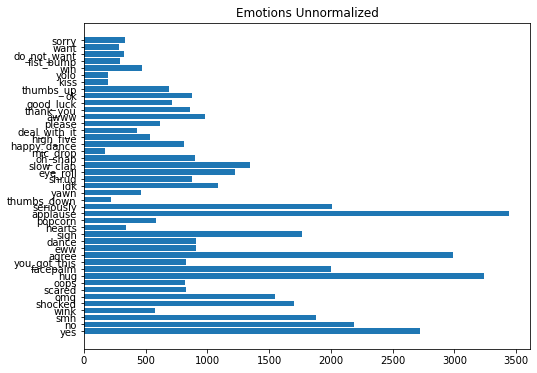

In [6]:
# Visualization of training classes
categories_dict = defaultdict(lambda: 0)
for i in range(len(df)):
    for each_category in df['categories'][i]:
        categories_dict[each_category] += 1
plt.figure(figsize=(8, 6))
plt.barh(list(categories_dict.keys()), categories_dict.values())
plt.title('Emotions Unnormalized')